# Task 2 - Dimensionality Reduction (29 points)

In [2]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# You may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

## 2.1 PCA Implementation (13.5 points)
### a) Implement PCA from scratch without using SVD. (10.5 points)

Use the template below and solve the questions stated in TODOs. You may use numpy functions if not stated otherwise.

Project the dataset `X` onto the first `n_components` Principal Components. The algorithm should work for any dataset with dimensionality >= 2.

Please do not change the name of the variables and make sure to save your results in those.

In [3]:
import numpy as np

class PCA_from_scratch:
    def __init__(self, n_components:int):
        self.n_components = n_components
        self.X_centred = None
        self.eigenvalues = None
        self.eigenvectors = None
        self.explained_variance_ratio = None
        self.X_new = None

    def fit_transform(self, X):        
        # Center the dataset on the origin
        self.X_centred = X - np.mean(X, axis=0)
    
        # Calculate the covariance matrix
        cov_matrix = np.dot(self.X_centred.T, self.X_centred) / (X.shape[0] - 1)
    
        # Calculate the eigenvalues and the eigenvectors of the covariance matrix
        self.eigenvalues, self.eigenvectors = np.linalg.eig(cov_matrix)
        
        # Sort the eigenvalues and eigenvectors by the eigenvalue in decreasing order
        idx = self.eigenvalues.argsort()[::-1]
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:, idx]
    
        # Calculate the explained variance ratio for the principal components
        self.explained_variance_ratio = self.eigenvalues / np.sum(self.eigenvalues)
        
        # Transform the dataset using the eigenvectors
        self.X_new = np.dot(self.X_centred, self.eigenvectors[:, :self.n_components])

        return self.X_new


### b) Compare your results with the scikit-learn PCA implementation. (3 points)

In [4]:
# here is a sample dataset you could use
rng = np.random.default_rng(seed=123)
X = rng.multivariate_normal(mean=(2, 1), cov=[[2.5, 0.6], [0.6, 0.8]], size=100)

In [5]:
from sklearn.decomposition import PCA

# PCA implementation
pca_scratch = PCA_from_scratch(n_components=2)
X_new_scratch = pca_scratch.fit_transform(X)

# scikit-learn PCA implementation
pca_sklearn = PCA(n_components=2)
X_new_sklearn = pca_sklearn.fit_transform(X)

# Compare the results
print("Explained variance ratio (scratch):", pca_scratch.explained_variance_ratio)
print("Explained variance ratio (sklearn):", pca_sklearn.explained_variance_ratio_)

print("Eigenvectors (scratch):\n", pca_scratch.eigenvectors)
print("Eigenvectors (sklearn):\n", pca_sklearn.components_.T)

print("Eigenvalues (scratch):", pca_scratch.eigenvalues)
print("Eigenvalues (sklearn):", pca_sklearn.explained_variance_)


Explained variance ratio (scratch): [0.78904207 0.21095793]
Explained variance ratio (sklearn): [0.78904207 0.21095793]
Eigenvectors (scratch):
 [[ 0.93416707 -0.35683594]
 [ 0.35683594  0.93416707]]
Eigenvectors (sklearn):
 [[ 0.93416707  0.35683594]
 [ 0.35683594 -0.93416707]]
Eigenvalues (scratch): [2.02881639 0.54242342]
Eigenvalues (sklearn): [2.02881639 0.54242342]


## 2.2 Theory Questions (6 points)
### Answer the following questions in 2-3 sentences:

### a) Are there multiple correct results when doing PCA on a dataset or is there only one unique way? Explain your answer. (3 points)

Up to the eigenvectors' sign, Principal Component Analysis (PCA) has a unique solution. The eigenvectors can have either direction, which means that their signs can be inverted. On the other hand, given a dataset, the principal component order and the eigenvectors' absolute values are distinct. This is so because the eigenvectors of the dataset's covariance matrix, which are exclusively determined by the data, are the principal components. As a result, even though the eigenvectors' signs might change, PCA's overall findings—which involve projecting the data onto the principal components—are distinct.

### b) As discussed in the lecture, the principal components are always orthogonal to eachother. Explain briefly why the vectors you got are orthogonal. (You do not need to prove it mathematically.) (3 points)


Since the principal components are the eigenvectors of the symmetric covariance matrix, they are orthogonal to one another. The eigenvectors of symmetric matrices that correspond to distinct eigenvalues are orthogonal to one another. This characteristic makes sure that the main components extract various kinds of information from the data. Put another way, a representation of the data that minimizes redundancy is made possible by each principal component capturing a direction in the data that is uncorrelated (orthogonal) to the directions captured by the other components. One important characteristic that makes PCA a helpful method for dimensionality reduction is its orthogonality.

## 2.3 Using More Dimensions (9.5 points)
### a) Reduce the dimensionality of the Iris dataset using your PCA implementation and create a scatter plot of the results. (5.5 points)
- Use the first two Principal Components to create a scatterplot.
- Colour the points by their corresponding Type label.
- Add a title and axis names to the plot.
  
(If you did not solve task 2.1, you may use the PCA implementation of scikit-learn instead for less points.)

In [6]:
from sklearn import datasets
iris = datasets.load_iris()

iris_data = iris.data
iris_labels = iris.target

In [6]:
import matplotlib.pyplot as plt

# PCA implementation
pca_scratch = PCA_from_scratch(n_components=2)
iris_data_new = pca_scratch.fit_transform(iris_data)

# Creating a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(iris_data_new[:, 0], iris_data_new[:, 1], c=iris_labels)
plt.title('PCA of Iris Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add color 
plt.colorbar(scatter, ticks=[0, 1, 2], label='Type')

plt.show()


NameError: name 'iris_data' is not defined

### b) Run PCA on the Iris dataset with n_components=4 and create a scree plot for the the explained variance ratios. (4 points)

(If you did not solve task 2.1, you may use the PCA implementation of scikit-learn instead for less points.)

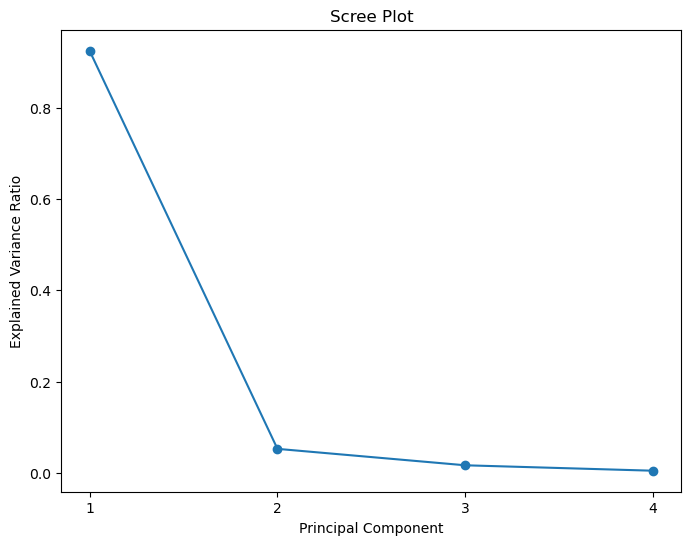

In [8]:
#  PCA implementation
pca_scratch = PCA_from_scratch(n_components=4)
iris_data_new = pca_scratch.fit_transform(iris_data)

# Creating a scree plot for the explained variance ratios
plt.figure(figsize=(8, 6))
plt.plot(range(1, 5), pca_scratch.explained_variance_ratio, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 5))
plt.show()
